### Follow Data science workshop and ML Oreilly book / Start build model from here:

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df_locat=pd.read_csv('/content/drive/My Drive/Data/NYC_zip_and_locate.csv')
df_locat.head(3)

,Unnamed: 0,url,address,neighborhood,rent,beds,baths,zip,Latitude,Longitude
0,0,https://www.renthop.com/listings/345-east-83rd...,"345 East 83rd St, Apt 29","Yorkville, Upper East Side, Upper Manhattan, M...",2150,1,1.0,10028.0,40.775331,-73.951205
1,1,https://www.renthop.com/listings/63-wall-stree...,"63 Wall Street, Apt 810","Financial District, Downtown Manhattan, Manhattan",3662,1,1.0,10005.0,40.705765,-74.008547
2,2,https://www.renthop.com/listings/blue-slip/-2r...,Blue Slip,"Greenpoint, Northern Brooklyn, Brooklyn",4121,1,1.0,NaN,NaN,NaN


In [0]:
df_locat.isnull().sum()

Unnamed: 0        0
url               0
address           3
neighborhood      0
rent              0
beds              0
baths             0
zip             879
Latitude        879
Longitude       879
dtype: int64

In [0]:
df_locat=df_locat.dropna()

In [0]:
df_new=df_locat[['zip','beds','baths','rent']]
print(df_new.shape)
df_new.head()

(1121, 4)


,zip,beds,baths,rent
0,10028.0,1,1.0,2150
1,10005.0,1,1.0,3662
4,10009.0,2,1.0,4150
7,10002.0,3,2.0,4600
8,10463.0,1,1.0,1925


In [0]:
df_new['zip']=df_new['zip'].astype('int')
df_new['zip']=df_new['zip'].astype('object')
df_new.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


zip       object
beds       int64
baths    float64
rent       int64
dtype: object

In [0]:
X=df_new.drop('rent',axis=1)
y=df_new['rent']
print(X.shape)
print(y.shape)

(1121, 3)
(1121,)


In [0]:
print(X.dtypes)

zip       object
beds       int64
baths    float64
dtype: object


In [0]:
X.isnull().sum()

zip      0
beds     0
baths    0
dtype: int64

In [0]:
X['beds'].value_counts()

2    367
1    357
0    177
3    168
4     45
5      7
Name: beds, dtype: int64

In [0]:
X['baths'].value_counts()

1.0    844
2.0    238
3.0     19
1.5     11
4.0      7
5.0      1
2.5      1
Name: baths, dtype: int64

In [0]:
#Not used
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [0]:
X_dum = pd.get_dummies(X, columns=['zip','beds','baths'] )
X_dum.reset_index(drop=True,inplace=True)
X_dum

,zip_10001,zip_10002,zip_10003,zip_10004,zip_10005,zip_10006,zip_10007,zip_10009,zip_10010,zip_10011,zip_10012,zip_10013,zip_10014,zip_10016,zip_10017,zip_10018,zip_10019,zip_10021,zip_10022,zip_10023,zip_10024,zip_10025,zip_10026,zip_10027,zip_10028,zip_10029,zip_10030,zip_10031,zip_10032,zip_10033,zip_10034,zip_10035,zip_10036,zip_10037,zip_10038,zip_10039,zip_10040,zip_10065,zip_10069,zip_10075,...,zip_11211,zip_11213,zip_11214,zip_11215,zip_11216,zip_11217,zip_11218,zip_11219,zip_11220,zip_11221,zip_11222,zip_11225,zip_11226,zip_11229,zip_11230,zip_11231,zip_11232,zip_11233,zip_11235,zip_11236,zip_11237,zip_11238,zip_11249,zip_11370,zip_11373,zip_11377,zip_11385,beds_0,beds_1,beds_2,beds_3,beds_4,beds_5,baths_1.0,baths_1.5,baths_2.0,baths_2.5,baths_3.0,baths_4.0,baths_5.0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split
seed = 10
test_data_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size = test_data_size, 
                                                    random_state = seed)
print(X_train.shape,X_test.shape)
print(X_test.shape,y_test.shape)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

(784, 99) (337, 99)
(337, 99) (337,)


f = plt.figure(figsize=(19, 15))
plt.matshow(train_data.corr(), fignum=f.number,cmap='RdYlBu_r')
plt.xticks(range(train_data.shape[1]), train_data.columns, fontsize=14, rotation=45)
plt.yticks(range(train_data.shape[1]), train_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [0]:
corrMatrix=train_data.corr()
corrMatrix.sort_values(by='rent',ascending=False)[:10]

,zip_10001,zip_10002,zip_10003,zip_10004,zip_10005,zip_10006,zip_10007,zip_10009,zip_10010,zip_10011,zip_10012,zip_10013,zip_10014,zip_10016,zip_10017,zip_10018,zip_10019,zip_10021,zip_10022,zip_10023,zip_10024,zip_10025,zip_10026,zip_10027,zip_10028,zip_10029,zip_10030,zip_10031,zip_10032,zip_10033,zip_10034,zip_10035,zip_10036,zip_10037,zip_10038,zip_10039,zip_10040,zip_10065,zip_10069,zip_10075,...,zip_11213,zip_11214,zip_11215,zip_11216,zip_11217,zip_11218,zip_11219,zip_11220,zip_11221,zip_11222,zip_11225,zip_11226,zip_11229,zip_11230,zip_11231,zip_11232,zip_11233,zip_11235,zip_11236,zip_11237,zip_11238,zip_11249,zip_11370,zip_11373,zip_11377,zip_11385,beds_0,beds_1,beds_2,beds_3,beds_4,beds_5,baths_1.0,baths_1.5,baths_2.0,baths_2.5,baths_3.0,baths_4.0,baths_5.0,rent
rent,0.034959,-0.038607,-0.015674,NaN,-0.002858,0.039658,NaN,-0.034683,0.039681,-0.067885,0.061486,0.025792,0.008045,-0.050486,-0.031702,-0.005331,-0.025623,-0.044750,-0.021242,0.249119,-0.074774,-0.007405,-0.015420,-0.039147,0.018632,0.076222,-0.014699,0.022547,0.068847,-0.043580,-0.012377,0.025720,0.030463,-0.009718,-0.033990,-0.018037,0.029049,-0.021811,0.088959,NaN,...,0.047344,NaN,-0.058875,-0.044630,-0.024910,NaN,-0.044543,-0.027017,0.083555,0.060527,-0.016983,-0.046086,NaN,-0.041741,-0.041609,0.262577,-0.054680,-0.003438,-0.022031,-0.058689,-0.019016,0.081523,NaN,NaN,NaN,0.008875,-0.005470,-0.010021,0.059652,-0.061095,0.006209,-0.021908,-0.129108,0.078835,0.134181,-0.009595,-0.018093,-0.052303,NaN,1.000000
zip_11232,-0.014569,-0.013462,-0.016264,NaN,-0.009982,-0.003138,-0.004441,-0.013074,-0.009982,-0.013074,-0.008335,-0.009464,-0.011841,-0.017517,-0.010949,-0.008917,-0.022427,-0.008335,-0.011403,-0.013074,-0.007712,-0.014569,-0.006289,-0.006289,-0.010476,-0.009982,-0.006289,-0.010949,-0.014569,-0.013074,-0.004441,-0.004441,-0.013074,-0.005443,-0.009982,-0.007036,-0.007036,-0.014209,-0.014922,-0.005443,...,-0.008917,-0.003138,-0.008335,-0.015606,-0.011841,NaN,-0.004441,-0.004441,-0.017818,-0.007036,-0.005443,-0.010476,-0.003138,-0.008917,-0.003138,1.000000,-0.009982,-0.003138,-0.003138,-0.012676,-0.012676,-0.007036,-0.003138,-0.003138,NaN,-0.006289,-0.038065,-0.026360,0.091316,-0.036410,-0.019266,-0.005443,-0.047666,-0.009464,0.057221,-0.003138,-0.011403,-0.006289,NaN,0.262577
zip_10023,-0.024699,-0.022822,-0.027573,NaN,-0.016922,-0.005320,-0.007529,-0.022164,-0.016922,-0.022164,-0.014131,-0.016043,-0.020075,-0.029696,-0.018561,-0.015116,-0.038020,-0.014131,-0.019332,1.000000,-0.013074,-0.024699,-0.010661,-0.010661,-0.017760,-0.016922,-0.010661,-0.018561,-0.024699,-0.022164,-0.007529,-0.007529,-0.022164,-0.009227,-0.016922,-0.011927,-0.011927,-0.024088,-0.025297,-0.009227,...,-0.015116,-0.005320,-0.014131,-0.026456,-0.020075,NaN,-0.007529,-0.007529,-0.030207,-0.011927,-0.009227,-0.017760,-0.005320,-0.015116,-0.005320,-0.013074,-0.016922,-0.005320,-0.005320,-0.021489,-0.021489,-0.011927,-0.005320,-0.005320,NaN,-0.010661,0.007469,0.034578,-0.033070,0.012534,-0.032661,-0.009227,-0.050915,-0.016043,0.044743,-0.005320,0.049248,-0.010661,NaN,0.249119
baths_2.0,-0.033338,0.099882,0.052660,NaN,0.019796,-0.019368,0.032952,-0.080686,-0.061603,-0.017972,-0.019074,0.027343,-0.004106,0.018868,0.056435,0.005565,0.064797,0.013294,0.001156,0.044743,0.022282,-0.052197,-0.038811,0.003925,0.090671,0.019796,-0.038811,-0.017968,0.004378,-0.059782,-0.027409,-0.027409,0.023838,0.015726,0.046929,-0.043420,-0.043420,0.028179,0.073840,-0.033590,...,-0.024732,-0.019368,-0.051441,-0.025611,-0.027097,NaN,0.093312,-0.027409,-0.016222,-0.005171,-0.033590,-0.038765,-0.019368,0.035861,-0.019368,0.057221,-0.007337,-0.019368,-0.019368,-0.035158,0.072513,0.033077,-0.019368,-0.019368,NaN,0.003925,-0.218227,-0.286145,0.233740,0.171179,0.186585,0.015726,-0.910827,-0.058404,1.000000,-0.019368,-0.070375,-0.038811,NaN,0.134181
zip_11201,-0.024699,-0.022822,-0.027573,NaN,-0.016922,-0.005320,-0.007529,-0.022164,-0.016922,-0.022164,-0.014131,-0.016043,-0.020075,-0.029696,-0.018561,-0.015116,-0.038

## Python ML 3 PACKT

### Evaluating the performance of linear regression models

In [0]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train, y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

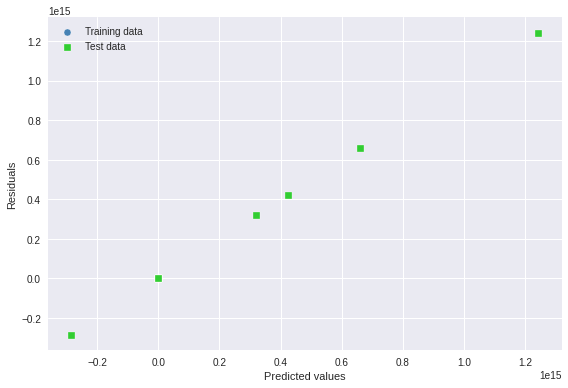

In [0]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
#plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
#plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()

In [0]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
# Kết quả test khá tệ do không sử dụng hàm thời gian ? Hoặc chưa thử các phương pháp regression khác ?

NameError: ignored

In [0]:
y_test_pred_df=pd.DataFrame(y_test_pred,columns=['y_test_pred_df'])
y_test_df=pd.DataFrame(y_test)
y_test_df.reset_index(drop=True,inplace=True)
#pd.concat([y_test_df, y_test_pred_df],axis=1)

In [0]:
y_train_pred_df=pd.DataFrame(y_train_pred,columns=['y_train_pred_df'])
y_train_df=pd.DataFrame(y_train)
y_train_df.reset_index(drop=True,inplace=True)
#pd.concat([y_train_df, y_train_pred_df],axis=1)

## Using regularized methods for regression

In [0]:
#LASSO regression:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
#print(lasso.coef_)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1590217.117, test: 3285862.180
R^2 train: 0.687, test: 0.325


In [0]:
#Ridge regression: BEST
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
#ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X_train, y_train)
y_train_pred = ridge_reg.predict(X_train)
y_test_pred = ridge_reg.predict(X_test)
#print(lasso.coef_)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1625816.161, test: 3018290.529
R^2 train: 0.680, test: 0.380


In [0]:
#Elastic Net regression:
from sklearn.linear_model import ElasticNet

elanet = ElasticNet(alpha=1.0, l1_ratio=0.5,random_state=42)
elanet.fit(X_train, y_train)
y_train_pred = elanet.predict(X_train)
y_test_pred = elanet.predict(X_test)
#print(lasso.coef_)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 3960963.075, test: 3903938.201
R^2 train: 0.220, test: 0.198


In [0]:
#Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor

#sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train, y_train)
y_train_pred = sgd_reg.predict(X_train)
y_test_pred = sgd_reg.predict(X_test)
#print(lasso.coef_)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1636317.554, test: 3118037.623
R^2 train: 0.678, test: 0.360


In [0]:
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
print(X_train.shape)
print(X_train_poly.shape)
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)
y_train_pred = lin_reg.predict(X_train_poly)
y_test_pred = lin_reg.predict(X_test_poly)
#print(lasso.coef_)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

(784, 99)
(784, 5049)
MSE train: 494000.921, test: 175207361911968780659932004352.000
R^2 train: 0.903, test: -35981365862733619134464.000


In [0]:
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
print(X_train.shape)
print(X_train_poly.shape)
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)
y_train_pred = lin_reg.predict(X_train_poly)
y_test_pred = lin_reg.predict(X_test_poly)
#print(lasso.coef_)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

(784, 99)
(784, 171699)
MSE train: 494282.338, test: 11945903384904838154084201529344.000
R^2 train: 0.903, test: -2453264038465990937280512.000


### Early stopping example

In [0]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train, y_train, test_size=0.5, random_state=10)

In [0]:
y_train1.shape

(392,)

In [0]:
from sklearn.base import clone

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly_scaled = poly_features.fit_transform(X_train1)
X_val_poly_scaled = poly_features.transform(X_val1)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  print(epoch)
  sgd_reg.fit(X_train_poly_scaled, y_train1)  # continues where it left off
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val1, y_val_predict)
  if val_error < minimum_val_error:
      minimum_val_error = val_error
      best_epoch = epoch
      best_model = clone(sgd_reg)

AttributeError: ignored

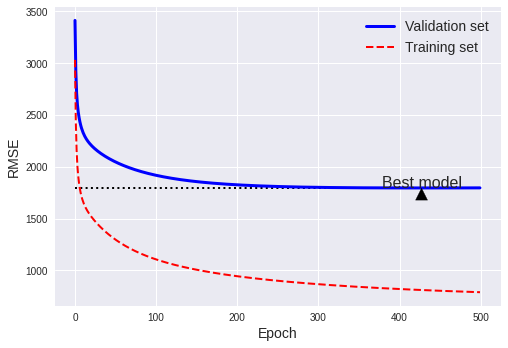

In [0]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train1)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train1, y_train_predict))
    val_errors.append(mean_squared_error(y_val1, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.save_fig("early_stopping_plot")
plt.show()

In [0]:
from sklearn.base import clone

poly_features = PolynomialFeatures(degree=3, include_bias=False)

X_train_poly_scaled = poly_features.fit_transform(X_train1)
X_val_poly_scaled = poly_features.transform(X_val1)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  print(epoch)
  sgd_reg.fit(X_train_poly_scaled, y_train1)  # continues where it left off
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val1, y_val_predict)
  if val_error < minimum_val_error:
      minimum_val_error = val_error
      best_epoch = epoch
      best_model = clone(sgd_reg)

AttributeError: ignored

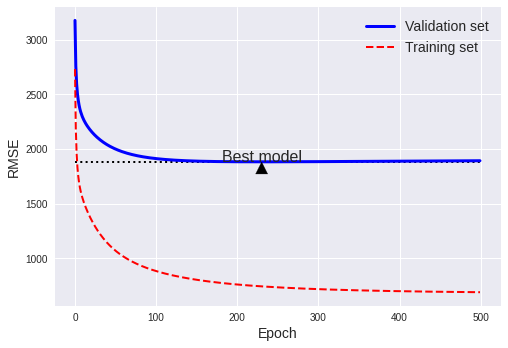

In [0]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train1)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train1, y_train_predict))
    val_errors.append(mean_squared_error(y_val1, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.save_fig("early_stopping_plot")
plt.show()

In [0]:
best_epoch, best_model

(230,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))

### Handson ML chap 2: end to end ML project

In [0]:
#Linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)
#print(lasso.coef_)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1592370.930, test: 6953931713513060714460217344.000
R^2 train: 0.686, test: -1428090454863969255424.000


In [0]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg.fit(X_train, y_train)
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)
#print(lasso.coef_)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 2898504.849, test: 3607070.705
R^2 train: 0.429, test: 0.259


In [0]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest_reg.fit(X_train, y_train)
y_train_pred = forest_reg.predict(X_train)
y_test_pred = forest_reg.predict(X_test)
#print(lasso.coef_)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 700470.480, test: 2984758.379
R^2 train: 0.862, test: 0.387


In [0]:
# Support vector Machine
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)

y_train_pred = svm_reg.predict(X_train)
y_test_pred = svm_reg.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 5135248.440, test: 4831955.103
R^2 train: -0.011, test: 0.008


In [0]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 753950.116, test: 2729822.536
R^2 train: 0.852, test: 0.439


In [0]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [0]:
grid_search.best_estimator_
#pd.DataFrame(grid_search.cv_results_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [0]:
# We can compute a 95% confidence interval for the test RMSE:
from scipy import stats

confidence = 0.95
squared_errors = (y_test_pred - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([ 993.27347496, 2114.95930816])

In [0]:
#Tuning hyperparameters via grid search
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer

scorer = make_scorer(mean_squared_error, greater_is_better=False)

parameters = [{'kernel': ['rbf','linear'], 
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
               'C': [1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")


gs = GridSearchCV(SVR(epsilon = 0.01),parameters, 
                  scoring=scorer, 
                  cv=10,
                  )
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
final_model = gs.best_estimator_
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

Tuning hyper-parameters
-2255788.5000594454
{'C': 10000, 'gamma': 0.1, 'kernel': 'rbf'}
MSE train: 1484984.640, test: 2550712.743
R^2 train: 0.708, test: 0.476


In [0]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)
y_train_pred = rnd_search.predict(X_train)
y_test_pred = rnd_search.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 719928.825, test: 2784709.532
R^2 train: 0.858, test: 0.428


In [0]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([2.14346636e-02, 1.27611366e-02, 6.16943950e-03, 0.00000000e+00,
       5.22892096e-03, 4.92069154e-05, 9.88159505e-03, 1.31177823e-03,
       1.34215798e-03, 3.09271307e-03, 1.20782472e-02, 3.07647092e-03,
       8.68571878e-03, 2.37133538e-02, 1.09191251e-02, 2.50686997e-03,
       9.63922764e-03, 9.69743209e-04, 1.10776266e-02, 2.16923151e-02,
       4.00305546e-03, 7.00970095e-03, 5.06248335e-04, 2.13334593e-03,
       3.42645710e-03, 2.60844140e-03, 1.39584040e-03, 4.36935127e-03,
       7.48345000e-03, 5.49933856e-03, 1.50444811e-03, 6.11133807e-04,
       1.99537993e-02, 8.03194886e-04, 1.18277727e-02, 6.69759468e-03,
       2.25585065e-03, 2.96890785e-02, 1.18311051e-02, 4.41903310e-04,
       8.86868399e-04, 1.53851397e-03, 1.85608905e-03, 1.01321442e-03,
       3.78623421e-03, 3.24691512e-03, 8.45632109e-05, 2.51260359e-03,
       1.45870524e-03, 6.08801586e-04, 0.00000000e+00, 1.80182742e-03,
       1.23763530e-03, 9.17556207e-04, 3.78691227e-03, 1.10251735e-02,
      

### Fine tune your model

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [0]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [2108.23834538  961.14225968 1669.53305885 2805.27427956 1665.33440764
 1191.66273874 1053.75208698 1207.11849248 1330.97413431 1156.6043032 ]
Mean: 1514.9634106818748
Standard deviation: 542.6213572697551


In [0]:
lin_scores = cross_val_score(lin_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [2.04802598e+03 3.10924261e+15 4.75692100e+15 7.27914720e+15
 2.47036579e+14 4.65609244e+15 1.21255495e+13 2.12135736e+14
 9.63578950e+14 1.88843566e+15]
Mean: 2312471572092281.5
Standard deviation: 2410113470093634.5


In [0]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [1940.18005732 1309.30291085 1674.66906241 2628.69866567 1356.90213649
 1093.81718707 1126.15194817 1165.29478    1312.66025141 1391.97241816]
Mean: 1499.9649417540145
Standard deviation: 449.2895920973115


### Data Science workshop

In [0]:
X_dum2 = pd.get_dummies(X, columns=['zip'] )
X_dum2.reset_index(drop=True,inplace=True)
X_dum2

,beds,baths,zip_10001,zip_10002,zip_10003,zip_10004,zip_10005,zip_10006,zip_10007,zip_10009,zip_10010,zip_10011,zip_10012,zip_10013,zip_10014,zip_10016,zip_10017,zip_10018,zip_10019,zip_10021,zip_10022,zip_10023,zip_10024,zip_10025,zip_10026,zip_10027,zip_10028,zip_10029,zip_10030,zip_10031,zip_10032,zip_10033,zip_10034,zip_10035,zip_10036,zip_10037,zip_10038,zip_10039,zip_10040,zip_10065,...,zip_11101,zip_11102,zip_11105,zip_11106,zip_11109,zip_11201,zip_11203,zip_11205,zip_11206,zip_11207,zip_11208,zip_11209,zip_11210,zip_11211,zip_11213,zip_11214,zip_11215,zip_11216,zip_11217,zip_11218,zip_11219,zip_11220,zip_11221,zip_11222,zip_11225,zip_11226,zip_11229,zip_11230,zip_11231,zip_11232,zip_11233,zip_11235,zip_11236,zip_11237,zip_11238,zip_11249,zip_11370,zip_11373,zip_11377,zip_11385
0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,3,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1117,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1118,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1119,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split
seed = 10
test_data_size = 0.3

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_dum2, y, test_size = test_data_size, 
                                                    random_state = seed)
print(X_train2.shape,X_test2.shape)
print(X_test2.shape,y_test2.shape)
train_data = pd.concat([X_train2, y_train2], axis = 1)
test_data = pd.concat([X_test2, y_test2], axis = 1)

(784, 88) (337, 88)
(337, 88) (337,)


In [0]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import statsmodels.api as sm
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

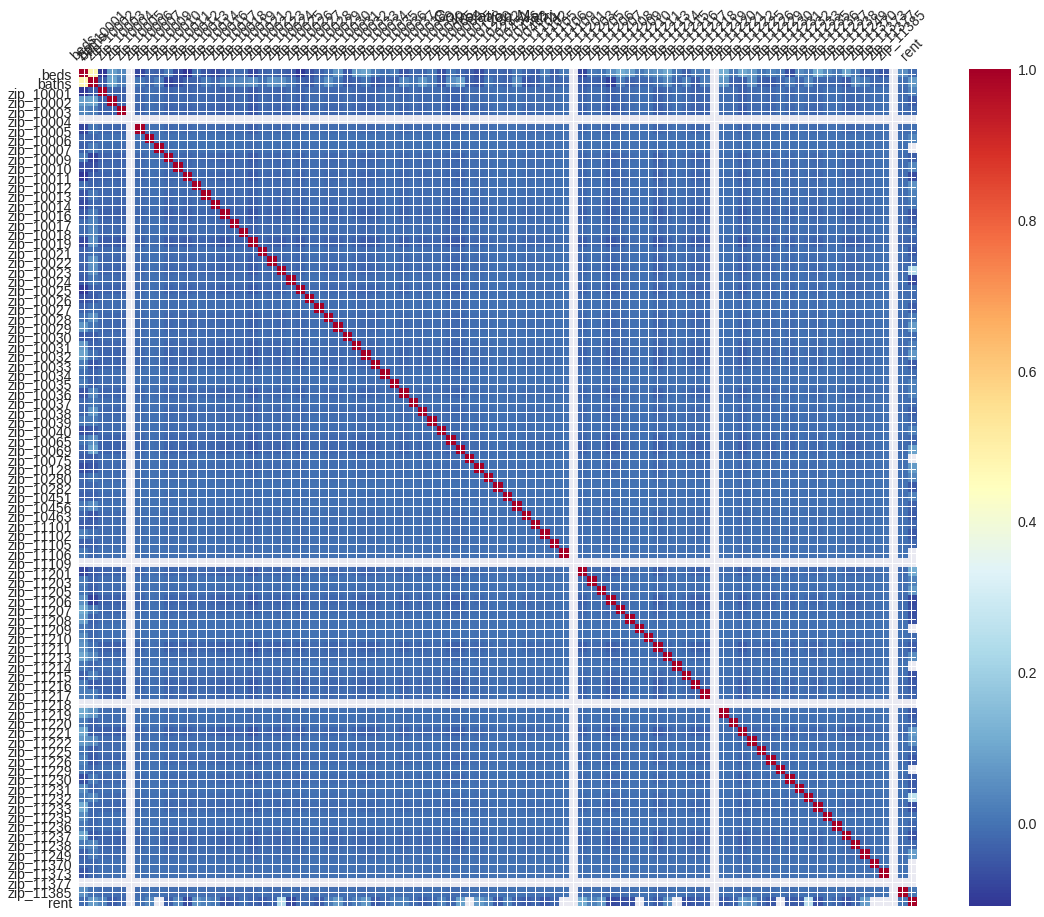

In [0]:
corrMatrix = train_data.corr(method = 'pearson')
xnames=list(train_data.columns)
ynames=list(train_data.columns)

f = plt.figure(figsize=(19, 15))
plt.matshow(corrMatrix, fignum=f.number,cmap='RdYlBu_r')
plt.xticks(range(train_data.shape[1]), xnames, fontsize=14, rotation=45)
plt.yticks(range(train_data.shape[1]), ynames, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [0]:
corrMatrix.sort_values(by='rent',ascending=False)[:10]

,beds,baths,zip_10001,zip_10002,zip_10003,zip_10004,zip_10005,zip_10006,zip_10007,zip_10009,zip_10010,zip_10011,zip_10012,zip_10013,zip_10014,zip_10016,zip_10017,zip_10018,zip_10019,zip_10021,zip_10022,zip_10023,zip_10024,zip_10025,zip_10026,zip_10027,zip_10028,zip_10029,zip_10030,zip_10031,zip_10032,zip_10033,zip_10034,zip_10035,zip_10036,zip_10037,zip_10038,zip_10039,zip_10040,zip_10065,...,zip_11102,zip_11105,zip_11106,zip_11109,zip_11201,zip_11203,zip_11205,zip_11206,zip_11207,zip_11208,zip_11209,zip_11210,zip_11211,zip_11213,zip_11214,zip_11215,zip_11216,zip_11217,zip_11218,zip_11219,zip_11220,zip_11221,zip_11222,zip_11225,zip_11226,zip_11229,zip_11230,zip_11231,zip_11232,zip_11233,zip_11235,zip_11236,zip_11237,zip_11238,zip_11249,zip_11370,zip_11373,zip_11377,zip_11385,rent
rent,-0.013465,0.078022,0.034959,-0.038607,-0.015674,NaN,-0.002858,0.039658,NaN,-0.034683,0.039681,-0.067885,0.061486,0.025792,0.008045,-0.050486,-0.031702,-0.005331,-0.025623,-0.044750,-0.021242,0.249119,-0.074774,-0.007405,-0.015420,-0.039147,0.018632,0.076222,-0.014699,0.022547,0.068847,-0.043580,-0.012377,0.025720,0.030463,-0.009718,-0.033990,-0.018037,0.029049,-0.021811,...,-0.046287,-0.021908,NaN,NaN,0.110902,0.031655,0.074037,-0.072705,-0.065525,-0.061110,NaN,-0.013954,-0.040370,0.047344,NaN,-0.058875,-0.044630,-0.024910,NaN,-0.044543,-0.027017,0.083555,0.060527,-0.016983,-0.046086,NaN,-0.041741,-0.041609,0.262577,-0.054680,-0.003438,-0.022031,-0.058689,-0.019016,0.081523,NaN,NaN,NaN,0.008875,1.000000
zip_11232,0.016643,0.037002,-0.014569,-0.013462,-0.016264,NaN,-0.009982,-0.003138,-0.004441,-0.013074,-0.009982,-0.013074,-0.008335,-0.009464,-0.011841,-0.017517,-0.010949,-0.008917,-0.022427,-0.008335,-0.011403,-0.013074,-0.007712,-0.014569,-0.006289,-0.006289,-0.010476,-0.009982,-0.006289,-0.010949,-0.014569,-0.013074,-0.004441,-0.004441,-0.013074,-0.005443,-0.009982,-0.007036,-0.007036,-0.014209,...,-0.006289,-0.004441,-0.003138,NaN,-0.013074,-0.004441,-0.005443,-0.015938,-0.010476,-0.004441,-0.003138,-0.003138,-0.016901,-0.008917,-0.003138,-0.008335,-0.015606,-0.011841,NaN,-0.004441,-0.004441,-0.017818,-0.007036,-0.005443,-0.010476,-0.003138,-0.008917,-0.003138,1.000000,-0.009982,-0.003138,-0.003138,-0.012676,-0.012676,-0.007036,-0.003138,-0.003138,NaN,-0.006289,0.262577
zip_10023,-0.029946,0.054220,-0.024699,-0.022822,-0.027573,NaN,-0.016922,-0.005320,-0.007529,-0.022164,-0.016922,-0.022164,-0.014131,-0.016043,-0.020075,-0.029696,-0.018561,-0.015116,-0.038020,-0.014131,-0.019332,1.000000,-0.013074,-0.024699,-0.010661,-0.010661,-0.017760,-0.016922,-0.010661,-0.018561,-0.024699,-0.022164,-0.007529,-0.007529,-0.022164,-0.009227,-0.016922,-0.011927,-0.011927,-0.024088,...,-0.010661,-0.007529,-0.005320,NaN,-0.022164,-0.007529,-0.009227,-0.027019,-0.017760,-0.007529,-0.005320,-0.005320,-0.028651,-0.015116,-0.005320,-0.014131,-0.026456,-0.020075,NaN,-0.007529,-0.007529,-0.030207,-0.011927,-0.009227,-0.017760,-0.005320,-0.015116,-0.005320,-0.013074,-0.016922,-0.005320,-0.005320,-0.021489,-0.021489,-0.011927,-0.005320,-0.005320,NaN,-0.010661,0.249119
zip_11201,-0.078637,-0.039373,-0.024699,-0.022822,-0.027573,NaN,-0.016922,-0.005320,-0.007529,-0.022164,-0.016922,-0.022164,-0.014131,-0.016043,-0.020075,-0.029696,-0.018561,-0.015116,-0.038020,-0.014131,-0.019332,-0.022164,-0.013074,-0.024699,-0.010661,-0.010661,-0.017760,-0.016922,-0.010661,-0.018561,-0.024699,-0.022164,-0.007529,-0.007529,-0.022164,-0.009227,-0.016922,-0.011927,-0.011927,-0.024088,...,-0.010661,-0.007529,-0.005320,NaN,1.000000,-0.007529,-0.009227,-0.027019,-0.017760,-0.007529,-0.005320,-0.005320,-0.028651,-0.015116,-0.005320,-0.014131,-0.026456,-0.020075,NaN,-0.007529,-0.007529,-0.030207,-0.011927,-0.009227,-0.017760,-0.005320,-0.015116,-0.005320,-0.013074,-0.016922,-0.005320,-0.005320,-0.021489,-0.021489,-0.011927,-0.005320,-0.005320,NaN,-0.010661,0.110902
zip_10069,-0.020285,0.094105,-0.028189,-0.026047,-0.031469,NaN,-0.019314,-0.006072,-0.008593,-0.025297,-0.019314,-0.025297,-0.0161

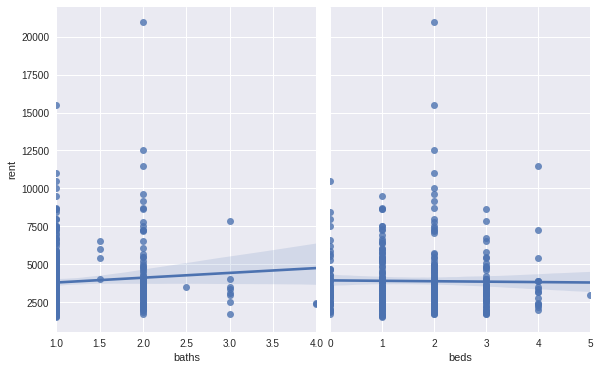

In [0]:
sns.pairplot(train_data, x_vars=["baths", "beds"], y_vars=["rent"],
             height=5, aspect=.8, kind="reg");

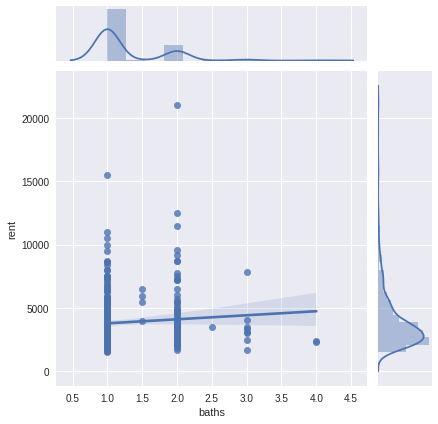

In [0]:
sns.jointplot(x="baths", y="rent", data=train_data, kind="reg");

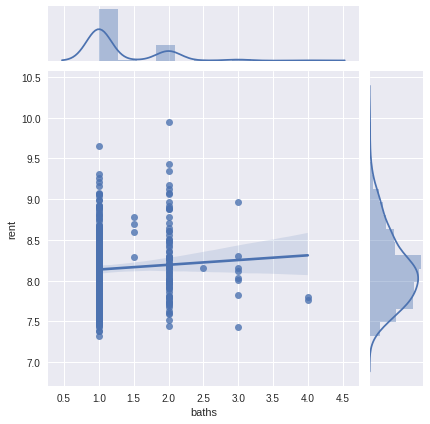

In [0]:
y = np.log(train_data['rent'])
sns.jointplot(x="baths", y=y, data=train_data, kind="reg");

In [0]:
linearModel = smf.ols(formula='rent ~ baths +beds',data=train_data)
linearModelResult = linearModel.fit()
linearModelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.540
Date:                Thu, 07 May 2020   Prob (F-statistic):              0.216
Time:                        14:24:14   Log-Likelihood:                -3150.1
No. Observations:                 346   AIC:                             6306.
Df Residuals:                     343   BIC:                             6318.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3542.5491    313.783     11.290      0.000    2925.367    4159.731
baths        422.6323    243.327      1.737      0.083     -55.969     901.234
beds        -121.6613    123.351     -0.986      0.325    -364.281     120.958
==============================================================================
Omnibus:                      237.820   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2872.514
Skew:                           2.754   Prob(JB):                         0.00
Kurtosis:                      15.997   Cond. No.                         7.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
y_list=list(y_train2)
results = sm.OLS(y_list,X_train2).fit()
results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     15.29
Date:                Thu, 07 May 2020   Prob (F-statistic):          2.69e-110
Time:                        14:13:22   Log-Likelihood:                -6759.7
No. Observations:                 784   AIC:                         1.369e+04
Df Residuals:                     700   BIC:                         1.408e+04
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
beds         571.3717     64.402      8.872      0.000     444.928     697.815
baths       2139.2762    126.194     16.952      0.000    1891.512    2387.040
zip_10001   1468.3303    333.264      4.406      0.000     814.014    2122.647
zip_10002    887.0624    376.827      2.354      0.019     147.216    1626.909
zip_10003    617.2497    313.759      1.967      0.050       1.228    1233.272
zip_10004   4.474e-12   1.08e-12      4.153      0.000    2.36e-12    6.59e-12
zip_10005   1486.5064    471.109      3.155      0.002     561.550    2411.463
zip_10006    789.3521   1425.775      0.554      0.580   -2009.955    3588.659
zip_10007   3982.2140   1018.520      3.910      0.000    1982.494    5981.934
zip_10009    230.1855    363.216      0.634      0.526    -482.938     943.310
zip_10010    422.7521    461.811      0.915      0.360    -483.949    1329.454
zip_10011    960.6042    367.537      2.614      0.009     238.998    1682.210
zip_10012   1854.3860    551.127      3.365      0.001     772.327    2936.445
zip_10013    832.7743    494.743      1.683      0.093    -138.583    1804.132
zip_10014   1228.6949    401.215      3.062      0.002     440.966    2016.424
zip_10016   1803.4780    295.085      6.112      0.000    1224.120    2382.836
zip_10017   1557.7178    436.687      3.567      0.000     700.344    2415.091
zip_10018    251.9032    526.957      0.478      0.633    -782.702    1286.508
zip_10019    612.8558    252.679      2.425      0.016     116.757    1108.955
zip_10021   -150.2616    554.222     -0.271      0.786   -1238.398     937.875
zip_10022   1337.5703    426.481      3.136      0.002     500.235    2174.906
zip_10023   1462.3632    378.148      3.867      0.000     719.924    2204.803
zip_10024   1238.3647    597.452      2.073      0.039      65.352    2411.378
zip_10025     45.4600    335.302      0.136      0.892    -612.857     703.777
zip_10026   -165.3050    718.999     -0.230      0.818   -1576.959    1246.349
zip_10027   -658.3099    723.030     -0.910      0.363   -2077.877     761.257
zip_10028    382.3286    458.514      0.834      0.405    -517.899    1282.556
zip_10029  -1028.3139    473.485     -2.172      0.030   -1957.934     -98.693
zip_10030   -254.3979    718.701     -0.354      0.723   -1665.465    1156.669
zip_10031  -1152.7418    433.114     -2.662      0.008   -2003.100    -302.384
zip_10032  -1355.2346    342.846     -3.953      0.000   -2028.364    -682.105
zip_10033   -803.2587    366.101     -2.194      0.029   -1522.046     -84.471
zip_10034  -1123.8337   1011.267     -1.111      0.267   -3109.314     861.646
zip_10035   -907.0196   1012.636     -0.896      0.371   -2895.187    1081.148
zip_10036   1196.4450    375.952      3.182      0.002     458.316    1934.574
zip_10037  -1114.5305    832.850     -1.338      0.181   -2749.713     520.652
zi

In [0]:
logLinearModel = smf.ols(formula='np.log(rent) ~ baths',\
data=train_data)
logLinearModResult = logLinearModel.fit()
logLinearModResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(rent)   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.695
Date:                Thu, 07 May 2020   Prob (F-statistic):              0.194
Time:                        14:28:04   Log-Likelihood:                -210.64
No. Observations:                 346   AIC:                             425.3
Df Residuals:                     344   BIC:                             433.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0794      0.063    129.004      0.000       7.956       8.203
baths          0.0581      0.045      1.302      0.194      -0.030       0.146
==============================================================================
Omnibus:                       29.745   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.838
Skew:                           0.744   Prob(JB):                     2.72e-08
Kurtosis:                       3.451   Cond. No.                         5.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
multiLogLinMod = smf.ols(formula=\
'np.log(rent) ~ \
(baths+ beds)**2',\
data=train_data)
multiLogLinModResult = multiLogLinMod.fit()
print(multiLogLinModResult.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(rent)   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.019
Date:                Thu, 07 May 2020   Prob (F-statistic):              0.385
Time:                        14:29:25   Log-Likelihood:                -209.95
No. Observations:                 346   AIC:                             427.9
Df Residuals:                     342   BIC:                             443.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0924      0.139     58.319      0.0